<a href="https://colab.research.google.com/github/mincfranc/DD_DataScience/blob/main/Project_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TRANSACTION DATA ANALYSIS**



#1.   Project 1

##**Problem Definition**

 Project 1 focuses on analyzing transaction data to predict customer behavior through binary classification. It aims to determine whether a future customer will make a transaction based on anonymized transaction data. The project is supervised and involves categorical outcomes using Gaussian Naive Bayes techniques to execute classification.

## 2. Data Collection



**3 Libraries loaded for**  

*   **Data manipulation: Pandas,**
*   **Scientific computing: Numpy, and**
*   **Data visualization: matplotlib.pyplot**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


3. Load data Train.csv from AWS.



*   **Data loaded from AWS: Train.csv**
*  **CSV file read into a Pandas DataFrame in Python**
*   **Assigned Dataframe variable: transaction_data**
*   **This code sets up the locations of the files containing the data**




In [ ]:
#Pull file for data exploration and assign its variable

url ='https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv'

transaction_data= pd.read_csv(url)

## Data Cleaning

4. Examine the data using tools we have used in class.
look at head, tail, shape


**Wide variation in range found amongst variables in dataframe head. Ex- var_1 and var_45**

In [ ]:
#Preview first few rows for glimpse at data's structure, column names, and types of values in each column.

transaction_data.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


**Similar variation found amongst last entries in dataframe tail**

In [ ]:
# Preview last few rows to compare content with head

transaction_data.tail()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
179995,179995,train_179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,179996,train_179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,179997,train_179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,179998,train_179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760
179999,179999,train_179999,0,11.6252,3.3959,11.5558,4.2003,7.4666,13.7381,12.9590,...,5.0415,-2.4210,-3.6829,14.2422,1.0741,26.3943,4.1482,11.9539,2.9846,15.6002


**Dataframe shape indicates 53 columns and 180,000 rows**

In [ ]:
#Output a tuple with number of rows and columns

transaction_data.shape

(180000, 53)

**Info shows dataframe has 50 Float columns, 2 Integer columns, and 1 Object column. Missing values not found.**

In [ ]:
# Summary of dataframe structure

transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  180000 non-null  int64  
 1   ID_code     180000 non-null  object 
 2   target      180000 non-null  int64  
 3   var_0       180000 non-null  float64
 4   var_1       180000 non-null  float64
 5   var_2       180000 non-null  float64
 6   var_3       180000 non-null  float64
 7   var_4       180000 non-null  float64
 8   var_5       180000 non-null  float64
 9   var_6       180000 non-null  float64
 10  var_7       180000 non-null  float64
 11  var_8       180000 non-null  float64
 12  var_9       180000 non-null  float64
 13  var_10      180000 non-null  float64
 14  var_11      180000 non-null  float64
 15  var_12      180000 non-null  float64
 16  var_13      180000 non-null  float64
 17  var_14      180000 non-null  float64
 18  var_15      180000 non-null  float64
 19  va

**Display of Count, Mean, Standard Deviation, Minimum & Maximum Value and Percentiles for each numerical column.**

**52 columns are numerical**

In [ ]:
#Generate descriptive statistics

transaction_data.describe()

,Unnamed: 0,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.00000,180000.000000,...,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,89999.500000,0.100222,10.678650,-1.630045,10.712922,5.408688,7.566953,14.024017,8.52808,15.243424,...,5.635897,-0.000418,-0.668334,20.208845,2.595090,12.756574,3.236201,7.440715,1.927078,15.870166
std,51961.668564,0.300297,3.041036,4.050519,2.639146,0.866265,1.235043,0.190038,4.64170,7.851050,...,0.369629,4.422915,5.968300,7.132446,2.801692,9.320939,4.561317,3.021636,1.476777,3.010492
min,0.000000,0.000000,0.408400,-15.043400,2.117100,2.347300,3.970500,13.434600,-6.01110,-10.664200,...,4.258800,-14.506000,-22.748700,-2.995300,-7.856100,-18.489700,-14.093300,-2.691700,-3.814500,6.299300
25%,44999.750000,0.000000,8.451675,-4.745600,8.720000,4.768500,6.618800,13.893900,5.06575,9.170200,...,5.374200,-3.253575,-4.997500,15.062900,0.628600,5.661300,-0.062000,5.160325,0.890000,13.830400
50%,89999.500000,0.000000,10.526750,-1.611250,10.579600,5.385600,7.628500,14.025500,8.59920,15.198900,...,5.634500,0.008500,-0.560300,20.203300,2.513800,12.520300,3.204650,7.350950,1.899700,15.934600
75%,134999.250000,0.000000,12.756200,1.360225,12.514100,6.003200,8.583800,14.164400,12.27330,21.010500,...,5.905600,3.098325,3.632525,25.639125,4.396725,19.461725,6.409900,9.511125,2.947225,18.061425
max,179999.000000,1.000000,20.315000,10.376800,19.353000,8.447700,11.150600,14.654500,22.33150,41.748000,...,7.089000,16.731900,18.855400,43.546800,13.448700,44.363400,18.440900,16.716500,8.402400,26.079100



5. If there are data cleaning issues, develop recommendations for how to deal with them.

missing values, do we assign median or mean to replace missing value



**Transaction_data is a pandas DataFrame type**

In [ ]:
# Return type of object in describe method.

type(transaction_data.describe())

pandas.core.frame.DataFrame

**Transaction_data copied as trans_clean to ensure changes do not affect original dataframe.**

In [ ]:
# Create copy of dataframe Transaction_data and assign to trans_clean

trans_clean=transaction_data.copy()

**Identify "Identifier" Variable: 'ID_Code'**

**All cells found to be unique, no duplicates**

In [ ]:
#Return count of unique values each column contains. If a column has as many unique values as there are rows, it’s likely an identifier.

trans_clean.nunique()

,0
Unnamed: 0,180000
ID_code,180000
target,2
var_0,90443
var_1,103081
var_2,83041
var_3,37907
var_4,48476
var_5,9500
var_6,108599


In [ ]:
for col in trans_clean.select_dtypes(include=['object', 'category']):
    print(f"{col}: {trans_clean[col].unique()}")
    print(f"Number of unique values: {trans_clean[col].nunique()}\n")

ID_code: ['train_0' 'train_1' 'train_2' ... 'train_179997' 'train_179998'
 'train_179999']
Number of unique values: 180000



**Columns 'Unnamed:0' and 'ID_code' unique and do not have duplicate values**

In [ ]:
# Check for duplicates between the two unique columns.

trans_clean['Duplicate'] = trans_clean['ID_code'] == trans_clean['Unnamed: 0']
print(trans_clean['Duplicate'])

0         False
1         False
2         False
3         False
4         False
          ...  
179995    False
179996    False
179997    False
179998    False
179999    False
Name: Duplicate, Length: 180000, dtype: bool


**Identify "Target" Variable: 'target'**



In [ ]:
# Return columns with binary data

binary_columns = [col for col in trans_clean.columns if trans_clean[col].nunique() == 2]

print("Potential target columns (binary):")
print(binary_columns)

Potential target columns (binary):
['target']


**Identify "Feature" Variables: 'var_0 through var_49'**

In [ ]:
# Return numerical or categorical columns holding transactional details, such as transaction_amount, product_type, excluding identifier columns and target column.

feature_columns = trans_clean.drop(columns=['ID_code', 'target', 'Unnamed: 0', 'Duplicate']).columns
print(feature_columns)

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14',
       'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21',
       'var_22', 'var_23', 'var_24', 'var_25', 'var_26', 'var_27', 'var_28',
       'var_29', 'var_30', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35',
       'var_36', 'var_37', 'var_38', 'var_39', 'var_40', 'var_41', 'var_42',
       'var_43', 'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49'],
      dtype='object')


In [ ]:
# Function to identify nominal columns

def identify_nominal_columns(trans_clean):
    nominal_columns = []

    # Loop through each column to check if it's categorical
    for col in trans_clean.select_dtypes(include=['object', 'category']):
        unique_values = trans_clean[col].unique()

        # Check if the number of unique values is relatively small
        if trans_clean[col].nunique() < 10:  # Assuming nominal columns have fewer unique values
            print(f"Unique values in {col}: {unique_values}")
            print(f"Number of unique values: {trans_clean[col].nunique()}")

            # For nominal columns, we check for the absence of a clear order
            if not any(ord_val in unique_values for ord_val in ['low', 'medium', 'high']):  # Example ordinal indicators
                nominal_columns.append(col)

    return nominal_columns

# Identify nominal columns
nominal_columns = identify_nominal_columns(trans_clean)
print("Nominal Columns:", len(nominal_columns))


Nominal Columns: 0


In [ ]:
# Function to identify ordinal columns

def identify_ordinal_columns(trans_clean):
    ordinal_columns = []

    # Loop through each column to check if it's categorical
    for col in trans_clean.select_dtypes(include=['object', 'category']):
        unique_values = trans_clean[col].unique()

        # Check if the number of unique values is relatively small
        if trans_clean[col].nunique() < 10:  # Assuming ordinal columns have fewer unique values
            print(f"Unique values in {col}: {unique_values}")
            print(f"Number of unique values: {trans_clean[col].nunique()}")

            # Check for specific order in the values (adjust these as needed)
            if any(ord_val in unique_values for ord_val in ['low', 'medium', 'high']):
                ordinal_columns.append(col)

    return ordinal_columns

# Identify ordinal columns
ordinal_columns = identify_ordinal_columns(trans_clean)

# Output the ordinal columns and their count
print("Ordinal Columns:", len(ordinal_columns))

Ordinal Columns: 0


In [ ]:
#Function to identify categorical columns

def classify_columns(trans_clean):
    categorical_cols = trans_clean.select_dtypes(include=['object', 'category']).columns
    ordinal_cols = []
    nominal_cols = []

    for col in categorical_cols:
        # You can customize the criteria for ordinality based on unique values
        if trans_clean[col].nunique() < 10:  # Assuming less than 10 unique values for ordinality
            print(f"Unique values in {col}: {trans_clean[col].unique()}")
            if 'low' in trans_clean[col].unique() and 'high' in trans_clean[col].unique():
                ordinal_cols.append(col)
            else:
                nominal_cols.append(col)

    return ordinal_cols, nominal_cols

ordinal_columns, nominal_columns = classify_columns(trans_clean)
print("Ordinal Columns:", len(ordinal_columns))
print("Nominal Columns:", len(nominal_columns))


Ordinal Columns: 0
Nominal Columns: 0


In [ ]:
# Function to identify discrete columns

def identify_discrete_columns(trans_clean):
    discrete_columns = []

    # Loop through each column in the DataFrame
    for col in trans_clean.columns:
        if pd.api.types.is_integer_dtype(trans_clean[col]):
            # If the column is of integer type, it's discrete
            discrete_columns.append(col)
        elif pd.api.types.is_object_dtype(trans_clean[col]):
            # For object type columns, check unique values
            unique_count = trans_clean[col].nunique()
            # Assuming a finite number of unique values (e.g., less than 10)
            if unique_count < 10:
                discrete_columns.append(col)

    return discrete_columns

# Identify discrete columns
discrete_columns = identify_discrete_columns(trans_clean)

# Output the discrete columns and their count
print("Discrete Columns:", discrete_columns)
print("Count of Discrete Columns:", len(discrete_columns))


Discrete Columns: ['Unnamed: 0', 'target']
Count of Discrete Columns: 2


In [ ]:
# Function to identify continuous columns

def identify_continuous_columns(trans_clean):
    continuous_columns = []

    # Loop through each column in the DataFrame
    for col in trans_clean.columns:
        # Check if the column is of float type
        if pd.api.types.is_float_dtype(trans_clean[col]):
            continuous_columns.append(col)
        # Optionally include integer columns that have a high number of unique values
        elif pd.api.types.is_integer_dtype(trans_clean[col]):
            unique_count = trans_clean[col].nunique()
            # Assuming a high number of unique values indicates continuous nature
            if unique_count > 10:  # You can adjust this threshold
                continuous_columns.append(col)

    return continuous_columns

# Identify continuous columns
continuous_columns = identify_continuous_columns(trans_clean)

# Output the continuous columns and their count
print("Continuous Columns:", continuous_columns)
print("Count of Continuous Columns:", len(continuous_columns))


Continuous Columns: ['Unnamed: 0', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_25', 'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37', 'var_38', 'var_39', 'var_40', 'var_41', 'var_42', 'var_43', 'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49']
Count of Continuous Columns: 51


In [ ]:
# Function to find duplicate rows

def find_duplicate_rows(trans_clean):
    # Find duplicate rows
    duplicates = trans_clean[trans_clean.duplicated()]

    return duplicates

# Identify duplicate rows
duplicate_rows = find_duplicate_rows(trans_clean)

# Output the duplicate rows and their count
print("Duplicate Rows:")
print(duplicate_rows)
print("Count of Duplicate Rows:", duplicate_rows.shape[0])

Duplicate Rows:
Empty DataFrame
Columns: [Unnamed: 0, ID_code, target, var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9, var_10, var_11, var_12, var_13, var_14, var_15, var_16, var_17, var_18, var_19, var_20, var_21, var_22, var_23, var_24, var_25, var_26, var_27, var_28, var_29, var_30, var_31, var_32, var_33, var_34, var_35, var_36, var_37, var_38, var_39, var_40, var_41, var_42, var_43, var_44, var_45, var_46, var_47, var_48, var_49, Duplicate]
Index: []

[0 rows x 54 columns]
Count of Duplicate Rows: 0


In [ ]:
# Function to find rows with missing values

def find_missing_rows(trans_clean):
    # Find rows with missing values
    missing_rows = trans_clean[trans_clean.isnull().any(axis=1)]

    return missing_rows

# Identify rows with missing values
missing_rows = find_missing_rows(trans_clean)

# Output the missing rows and their count
print("Rows with Missing Values:")
print(missing_rows)
print("Count of Rows with Missing Values:", missing_rows.shape[0])

Rows with Missing Values:
Empty DataFrame
Columns: [Unnamed: 0, ID_code, target, var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9, var_10, var_11, var_12, var_13, var_14, var_15, var_16, var_17, var_18, var_19, var_20, var_21, var_22, var_23, var_24, var_25, var_26, var_27, var_28, var_29, var_30, var_31, var_32, var_33, var_34, var_35, var_36, var_37, var_38, var_39, var_40, var_41, var_42, var_43, var_44, var_45, var_46, var_47, var_48, var_49, Duplicate]
Index: []

[0 rows x 54 columns]
Count of Rows with Missing Values: 0


**Dropping Columns to view relationships between target and feature columns.**

In [ ]:
#Drop columns "Unnamed:0" & "ID_code"

trans_clean.drop("Unnamed: 0", axis = 1, inplace = True)
trans_clean.drop("ID_code", axis = 1, inplace = True)

In [ ]:
#Drop "Duplicate" column as it does not contain feature or target data

trans_clean.drop("Duplicate", axis=1, inplace = True)

In [ ]:
#Check dataframe for dropped columns
trans_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   target  180000 non-null  int64  
 1   var_0   180000 non-null  float64
 2   var_1   180000 non-null  float64
 3   var_2   180000 non-null  float64
 4   var_3   180000 non-null  float64
 5   var_4   180000 non-null  float64
 6   var_5   180000 non-null  float64
 7   var_6   180000 non-null  float64
 8   var_7   180000 non-null  float64
 9   var_8   180000 non-null  float64
 10  var_9   180000 non-null  float64
 11  var_10  180000 non-null  float64
 12  var_11  180000 non-null  float64
 13  var_12  180000 non-null  float64
 14  var_13  180000 non-null  float64
 15  var_14  180000 non-null  float64
 16  var_15  180000 non-null  float64
 17  var_16  180000 non-null  float64
 18  var_17  180000 non-null  float64
 19  var_18  180000 non-null  float64
 20  var_19  180000 non-null  float64
 21  var_20  18

## Exploratory Data Analysis

6. Produce some visual analysis of the data – like plots showing the distributions of all variables. Recall that Gaussian Naive Bayes assumes the predictors are normally distributed. Note: you might have to do multiple plots in groups.




**Histograms conducted to visually inspect if criteria of normal distribution is met for Gaussian Naive Bayes model**

**Outputs indicate data distributions are not normal for most variables**

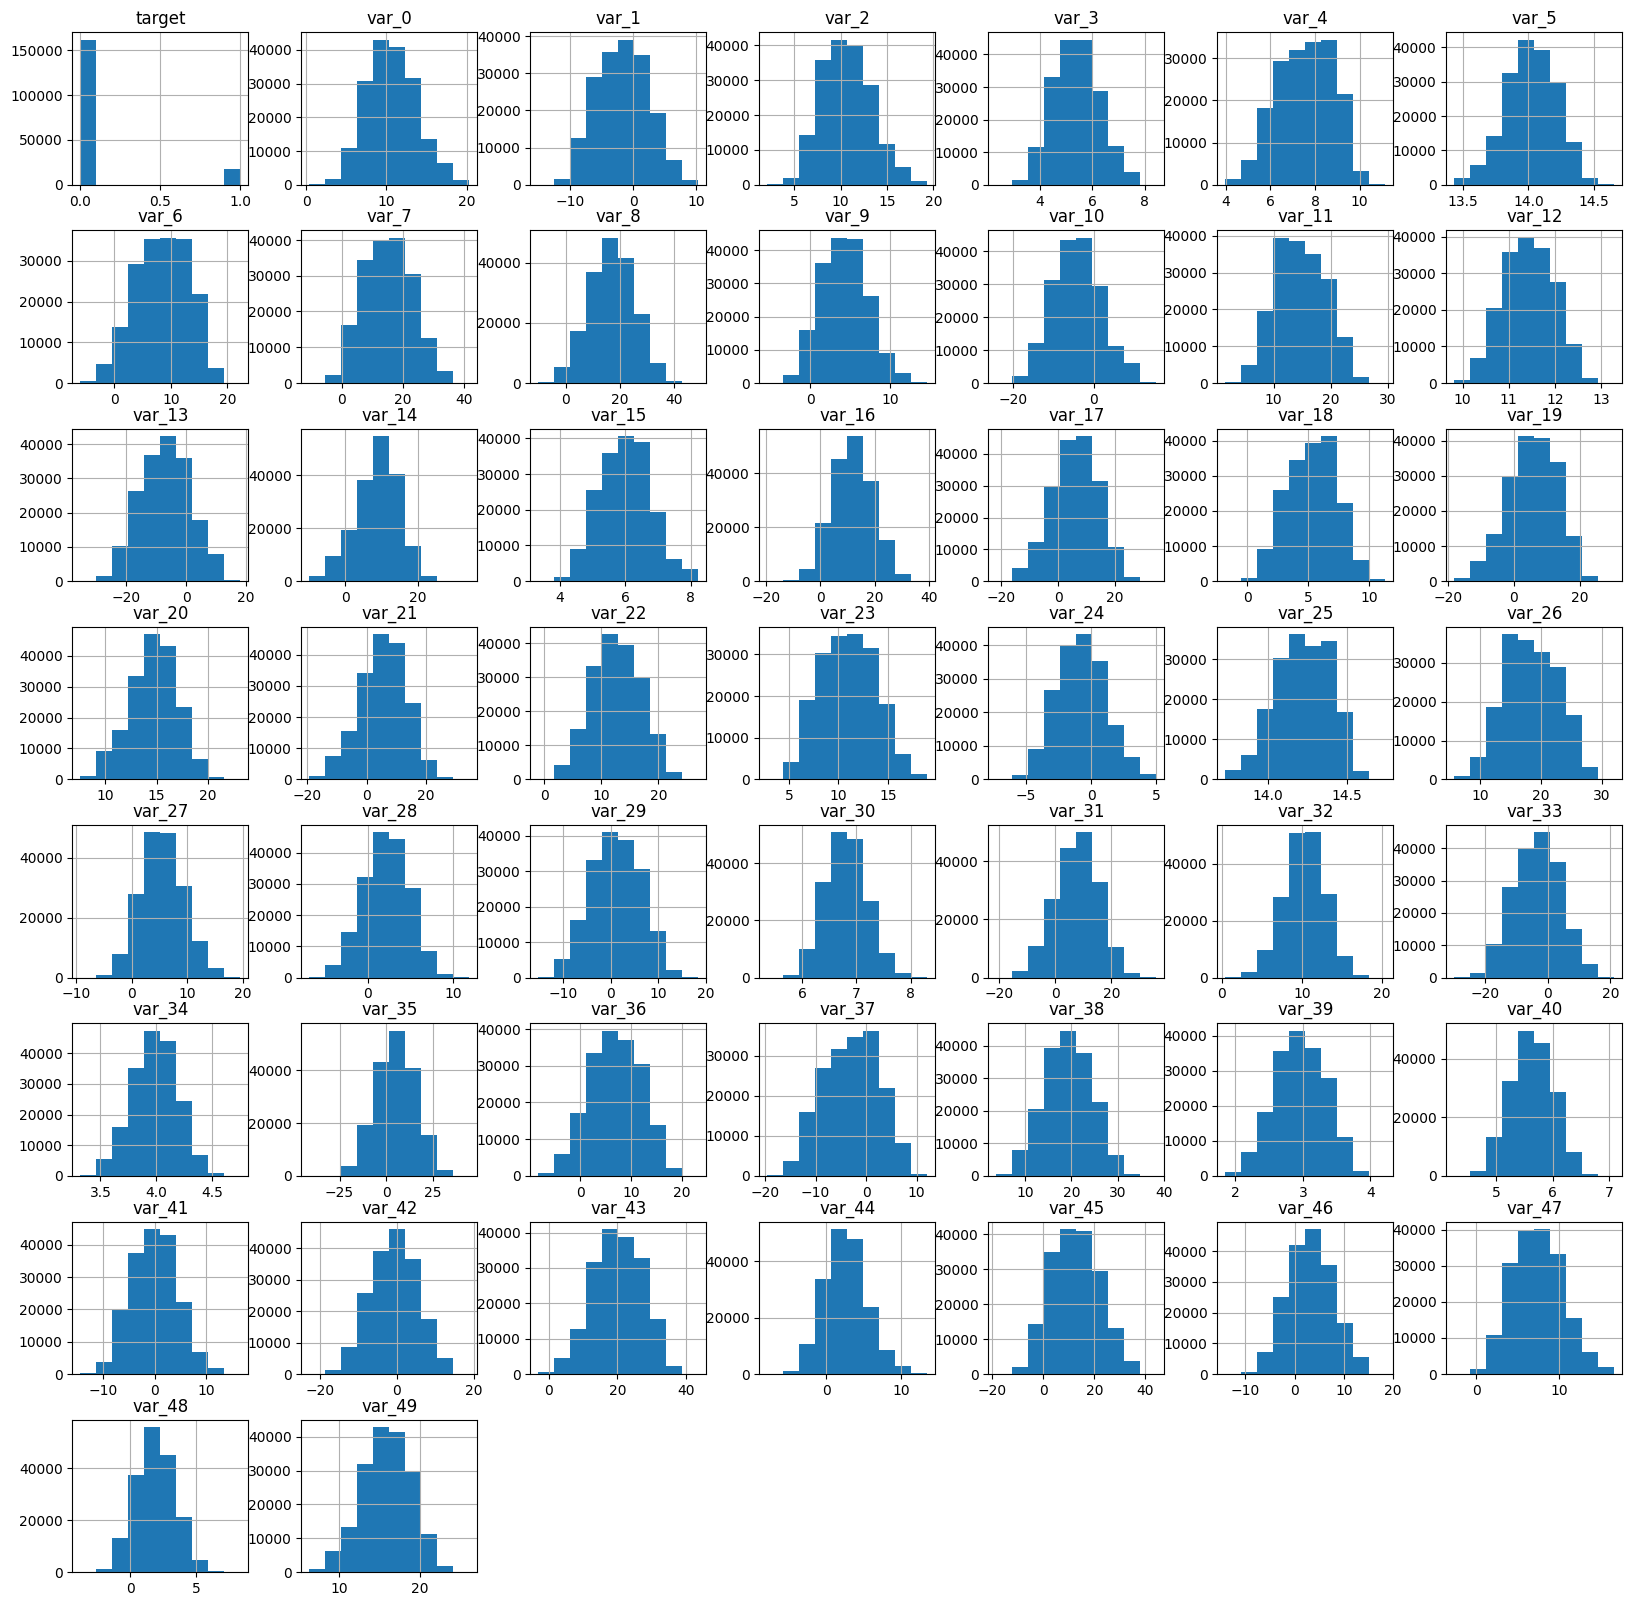

In [ ]:
#Return histogram for every column

trans_clean.hist(figsize=(20, 20))
plt.show()

**Correlations conducted to find relationships between target and feature variables**

**The square matrix output indicate zero relationships between target variable and feature variables**

In [ ]:
#Return correlation matrix for target and feature columns.

rs = np.random.RandomState(0)
corr = trans_clean.corr()
corr.style.background_gradient(cmap= 'coolwarm')

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
target,1.000000,0.052904,0.049916,0.055450,0.066924,-0.042073,-0.070015,-0.054375,0.044769,-0.057378,0.059227,0.063565,-0.045516,-0.052324,0.049072,-0.048623,0.062887,0.045281,-0.059906,0.048392,-0.057320,-0.080689,-0.040311,-0.046433,0.047569,0.059306,-0.047005,-0.050278,0.064868,-0.049551,-0.041987,0.052457,-0.073296,-0.063871,0.040520,-0.053733,-0.048198,-0.045513,0.040147,-0.055704,-0.057373,-0.050049,0.047948,0.041593,-0.061291,0.051110,0.047543,0.056902,0.045506,-0.042765,-0.051718
var_0,0.052904,1.000000,-0.002155,0.006632,0.007155,-0.002247,-0.003147,-0.001717,0.004266,0.000289,0.002817,0.006102,-0.003080,-0.003419,0.006984,-0.003111,-0.000807,0.002762,-0.007308,0.003033,-0.003159,-0.007543,-0.000473,0.000999,0.002101,0.004061,-0.003717,-0.004076,0.006209,-0.000320,-0.000785,0.002141,-0.006605,0.000216,0.001071,-0.001549,-0.003448,-0.002529,-0.000680,-0.002785,-0.008580,-0.002602,0.002043,0.001072,-0.001493,0.003662,-0.000227,0.002330,-0.000037,-0.005759,-0.005945
var_1,0.049916,-0.002155,1.000000,0.005644,0.002640,-0.000408,-0.002629,-0.001234,-0.000374,-0.000378,0.001282,0.004161,0.000955,-0.003251,0.001400,-0.005702,0.004442,0.002061,-0.003249,0.002386,-0.009469,-0.002229,-0.003555,0.000353,0.003639,0.004988,-0.001364,-0.000936,0.002923,-0.007531,-0.003454,0.002295,0.001009,-0.004563,0.002160,-0.001535,-0.003538,0.000531,0.003900,0.002074,-0.007379,-0.003109,0.001891,0.003331,-0.005291,0.000805,0.000387,0.005835,0.003845,-0.003810,-0.005352
var_2,0.055450,0.006632,0.005644,1.000000,0.000679,-0.001293,-0.002718,-0.009171,0.003436,-0.006433,0.000511,0.006676,0.001006,-0.006361,0.000502,0.001173,0.000238,-0.002321,-0.008054,0.003295,-0.008065,-0.003277,-0.004516,-0.001183,-0.002632,0.005903,-0.000660,-0.000789,0.004149,-0.002385,-0.003774,0.000987,-0.002583,-0.003880,0.001614,-0.000990,-0.005730,-0.005019,-0.000033,-0.003032,-0.008062,-0.004639,0.002059,0.000459,-0.005709,0.001388,0.004021,-0.000657,0.000968,-0.002388,-0.000372
var_3,0.066924,0.007155,0.002640,0.000679,1.000000,-0.006768,-0.002568,-0.005282,0.002685,-0.004835,0.002293,0.003590,0.000116,-0.003659,0.000999,-0.006827,0.003167,0.001771,-0.003353,0.005542,-0.008879,-0.003882,-0.005799,-0.004269,0.001711,0.005080,-0.002887,-0.001757,0.003192,-0.004857,-0.000245,0.002256,-0.003911,-0.001359,-0.004274,-0.006517,-0.002966,-0.003190,0.001802,0.001561,-0.003894,-0.004825,0.002188,-0.000344,-0.005121,-0.000999,0.003463,0.000276,0.005311,-0.001109,-0.002987
var_4,-0.042073,-0.002247,-0.000408,-0.001293,-0.006768,1.000000,0.000845,0.000210,-0.001267,0.000962,-0.005332,-0.003446,0.003206,0.003278,-0.000803,0.001561,-0.001129,-0.003054,-0.000039,-0.002726,0.002086,0.000842,0.001610,0.001980,-0.007927,-0.003609,0.004553,0.002389,-0.002513,0.001646,0.002574,-0.002446,0.000657,-0.000499,-0.002492,0.004187,0.002901,0.002981,0.001161,0.004357,0.004569,-0.000824,-0.000685,-0.004266,0.000483,-0.003563,-0.004458,0.000043,-0.000716,0.000190,0.001484
var_5,-0.070015,-0.003147,-0.002629,-0.002718,-0.002568,0.000845,1.000000,0.004778,0.000110,0.005587,-0.004708,-0.006633,0.008232,0.003767,-0.004156,-0.001322,-0.004501,-0.000761,0.005801,-0.005806,0.007575,0.005668,0.002973,0.006521,-0.003263,-0.009386,0.003363,0.005223,-0.004910,0.002953,0.002366,-0.003349,0.004910,0.008401,0.000237,0.006401,0.003790,0.002574,-0.002633,0.004442,0.007981,0.007054,-0.000356,-0.006139,0.004441,-0.005371,-0.002999,0.001721,-0.004525,0.003204,0.008009
var_6,-0.054375,-0.001717,-0.001234,-0.009171,-0.005282,0.000210,0.004778,1.000000,0.001922,0.001879,0.000293,-0.007201,0.002331,0.005578,-0.004100,0.007995,-0.000941,-0.004249,0.001999,-0.003728,0.003756,0.00550


7. NOTE: the ‘target’ column indicates a successful transaction (‘1’) or a no-transaction (‘0’). Verify these are the only values in that column.


**'target' column contains only 2 values:**

*   **0= No Transaction**
*   **1= Successful Transaction**

**Distribution is disproportionate between two values**

In [ ]:
#Return all values in column 'target' and response count

trans_clean['target'].value_counts()

,count
target,
0,161960
1,18040


In [ ]:
18040/161960*100

11.138552729068905

8. Check the correlation values between all **predictor columns** to ensure there are no substantial correlations between predictors. This is important to support the decision to classify the ‘target’ using Naïve Bayes.


**Correlations between all predictor columns indicate zero relationship amongst all predictors**

In [ ]:
#Return correlation matrix for all predictor columns

predictors = trans_clean.drop(columns=['target'])
correlation_matrix = predictors.corr()
correlation_matrix.style.background_gradient(cmap= 'coolwarm')

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
var_0,1.000000,-0.002155,0.006632,0.007155,-0.002247,-0.003147,-0.001717,0.004266,0.000289,0.002817,0.006102,-0.003080,-0.003419,0.006984,-0.003111,-0.000807,0.002762,-0.007308,0.003033,-0.003159,-0.007543,-0.000473,0.000999,0.002101,0.004061,-0.003717,-0.004076,0.006209,-0.000320,-0.000785,0.002141,-0.006605,0.000216,0.001071,-0.001549,-0.003448,-0.002529,-0.000680,-0.002785,-0.008580,-0.002602,0.002043,0.001072,-0.001493,0.003662,-0.000227,0.002330,-0.000037,-0.005759,-0.005945
var_1,-0.002155,1.000000,0.005644,0.002640,-0.000408,-0.002629,-0.001234,-0.000374,-0.000378,0.001282,0.004161,0.000955,-0.003251,0.001400,-0.005702,0.004442,0.002061,-0.003249,0.002386,-0.009469,-0.002229,-0.003555,0.000353,0.003639,0.004988,-0.001364,-0.000936,0.002923,-0.007531,-0.003454,0.002295,0.001009,-0.004563,0.002160,-0.001535,-0.003538,0.000531,0.003900,0.002074,-0.007379,-0.003109,0.001891,0.003331,-0.005291,0.000805,0.000387,0.005835,0.003845,-0.003810,-0.005352
var_2,0.006632,0.005644,1.000000,0.000679,-0.001293,-0.002718,-0.009171,0.003436,-0.006433,0.000511,0.006676,0.001006,-0.006361,0.000502,0.001173,0.000238,-0.002321,-0.008054,0.003295,-0.008065,-0.003277,-0.004516,-0.001183,-0.002632,0.005903,-0.000660,-0.000789,0.004149,-0.002385,-0.003774,0.000987,-0.002583,-0.003880,0.001614,-0.000990,-0.005730,-0.005019,-0.000033,-0.003032,-0.008062,-0.004639,0.002059,0.000459,-0.005709,0.001388,0.004021,-0.000657,0.000968,-0.002388,-0.000372
var_3,0.007155,0.002640,0.000679,1.000000,-0.006768,-0.002568,-0.005282,0.002685,-0.004835,0.002293,0.003590,0.000116,-0.003659,0.000999,-0.006827,0.003167,0.001771,-0.003353,0.005542,-0.008879,-0.003882,-0.005799,-0.004269,0.001711,0.005080,-0.002887,-0.001757,0.003192,-0.004857,-0.000245,0.002256,-0.003911,-0.001359,-0.004274,-0.006517,-0.002966,-0.003190,0.001802,0.001561,-0.003894,-0.004825,0.002188,-0.000344,-0.005121,-0.000999,0.003463,0.000276,0.005311,-0.001109,-0.002987
var_4,-0.002247,-0.000408,-0.001293,-0.006768,1.000000,0.000845,0.000210,-0.001267,0.000962,-0.005332,-0.003446,0.003206,0.003278,-0.000803,0.001561,-0.001129,-0.003054,-0.000039,-0.002726,0.002086,0.000842,0.001610,0.001980,-0.007927,-0.003609,0.004553,0.002389,-0.002513,0.001646,0.002574,-0.002446,0.000657,-0.000499,-0.002492,0.004187,0.002901,0.002981,0.001161,0.004357,0.004569,-0.000824,-0.000685,-0.004266,0.000483,-0.003563,-0.004458,0.000043,-0.000716,0.000190,0.001484
var_5,-0.003147,-0.002629,-0.002718,-0.002568,0.000845,1.000000,0.004778,0.000110,0.005587,-0.004708,-0.006633,0.008232,0.003767,-0.004156,-0.001322,-0.004501,-0.000761,0.005801,-0.005806,0.007575,0.005668,0.002973,0.006521,-0.003263,-0.009386,0.003363,0.005223,-0.004910,0.002953,0.002366,-0.003349,0.004910,0.008401,0.000237,0.006401,0.003790,0.002574,-0.002633,0.004442,0.007981,0.007054,-0.000356,-0.006139,0.004441,-0.005371,-0.002999,0.001721,-0.004525,0.003204,0.008009
var_6,-0.001717,-0.001234,-0.009171,-0.005282,0.000210,0.004778,1.000000,0.001922,0.001879,0.000293,-0.007201,0.002331,0.005578,-0.004100,0.007995,-0.000941,-0.004249,0.001999,-0.003728,0.003756,0.005505,0.001476,0.006360,-0.003612,-0.002642,-0.000822,0.000993,-0.001736,-0.000732,0.004282,-0.002727,0.005050,0.004149,-0.001968,0.001237,0.004320,0.007089,-0.005349,0.005744,0.002467,0.001306,-0.001122,-0.001814,0.000897,-0.005164,-0.002714,-0.001001,-0.002799,-0.002182,-0.001663
var_7,0.004266,-0.000374,0.003436,0.002685,-0.001267,0.000110,0.001922,1.000000,-0.003654,0.004690,0.001987,-0.001832,-0.005472,0.000639,0.000424,0.006694,0.004549,-0.003245,-0.003520,-0.005636,-0.004657,-0.005194,0.001788,0.000279,0.000857,-0.005090,-0.004584,0.000274,-0.004421,-0.0019

9. Create two data frames: one with all successful transactions, one with all unsuccessful transactions. **Make sure they are copies and not slices**.

**2 Separate dataframes were created as copies from 'trans_clean' df:**

*   **Df 1: 'Successful' contains all rows with successful transactions**
*  **Df 2: 'Unsuccessful'contains all rows with No Transaction**

In [ ]:
#Return dataframe split into two separate copies of trans_clean df

Successful= trans_clean[trans_clean['target']==1].copy()
Unsuccessful= trans_clean[trans_clean['target']==0].copy()

**Verify each new dataframe copy contains only its designated values**

In [ ]:
#Return dataframe value contents and counts

print(Successful['target'].value_counts())
print(Unsuccessful['target'].value_counts())

target
1    18040
Name: count, dtype: int64
target
0    161960
Name: count, dtype: int64


In [ ]:
#Return count difference
161960-18040

143920

## Data Processing

10. Create two data frames: one with all the predictor columns (everything except for Unnamed: 0, ID_code and target) and one with just the target. Make sure they are copies and not slices.


**2 Additional separate dataframes were created as copies from 'trans_clean' df:

*  **Df 1: 'Predictor' contains all columns except 'target' column**
*  **Df 2: 'Target'contains only 'target' column**





In [ ]:
#Return dataframe split into two separate copies of trans_clean df

Predictor= trans_clean.drop(columns=['target']).copy()
Target= trans_clean['target'].copy()


11. Define a Gaussian Naïve Bayes model using Sklearn.


**To create Gaussian Naive Bayes model object:**

* **Imported 4 sklearn libraries**
* **Dataset was loaded into Pandas**

* **Copied features (X) and target (y) to avoid modifying originals**  
* **Defined the Gaussian Naïve Bayes model**





In [ ]:
# Create a Gaussian Naive Bayes model object
# Dataset loaded into a Pandas DataFrame= transaction_data = pd.read_csv(url)

from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

y= Target.copy()
X= Predictor.copy()

gnb= GaussianNB()


12. Divide the two data frames you created in step #10 into training and testing subsets.

**Divided 2 dataframes from step#10 into:**

**Training Set (X_train, y_train): used by model to learn patterns and relationships between input features (X_train) and target variable (y_train).**

**Testing Set (X_test, y_test): used to evaluate model's performance after training by comparing the model's predictions (y_pred) with the actual target values (y_test).**

In [ ]:
# Return split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

13. Train the model using the training subset of the dataset.

In [ ]:
# Fit model to training data

gnb.fit(X_train, y_train)

GaussianNB()


14. Test the model using the testing subset of the dataset. Calculate and report the accuracy.


In [ ]:
# Make predictions on the test set

y_pred = gnb.predict(X_test)

*   **Accuracy score is 0.91 meaning 91% of predictions made by the model were correct**
*   **In spite of High Accuracy overall, the dataset is imbalanced**
*  **Per Classification Report while all metrics are high for "No Transaction" class,**
*   **Precision and recall for the minority class "Transaction" are notably low**


In [ ]:
# Evaluate the model
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     32378
           1       0.64      0.22      0.32      3622

    accuracy                           0.91     36000
   macro avg       0.78      0.60      0.64     36000
weighted avg       0.89      0.91      0.89     36000



15. Perform a cross-validation loop to calculate the accuracy of your model. Report that accuracy. How does it compare to the accuracy you calculated in #14?

**To perform cross-validation loop to calculate accuracy of my model:**

*   **Imported 3 libraries and Utilized y, X variables**
*   **Initialized GNB model in Q. 11 and Performed 5-fold cross-validation on dataset**
*   **Mean accuracy from cross validation: 0.91 is similar to accuracy rate in Q. 14: 0.91**
*   ****





In [ ]:
# Return cross-validation loop to calculate model accuracy

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

y = Target.copy()  # Target variable
X = Predictor.copy()  # Feature variables

cv_scores = cross_val_score(gnb, X, y, cv=5)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.2f}")
print(f"Standard deviation: {cv_scores.std():.2f}")


Cross-validation scores: [0.91097222 0.91011111 0.91133333 0.91097222 0.91263889]
Mean accuracy: 0.91
Standard deviation: 0.00


In [ ]:
#Another way to calculate model accuracy with cross-validation loop
y = Target.copy()  # Target variable
X = Predictor.copy()

results = cross_val_score(gnb, X, y, scoring='accuracy', cv = 10)
acc = results.mean()
acc


0.9112166666666666

16. Plot a histogram of the accuracy scores you generated in your cross-validation loop. What do you notice about the distribution of accuracy scores?


**Plotted histogram of the accuracy scores from cross validation loop by:**

*   **Using matplotlib to visualize histograms**
*   **Histogram outputs show the distribution of the accuracy scores appears normalized.



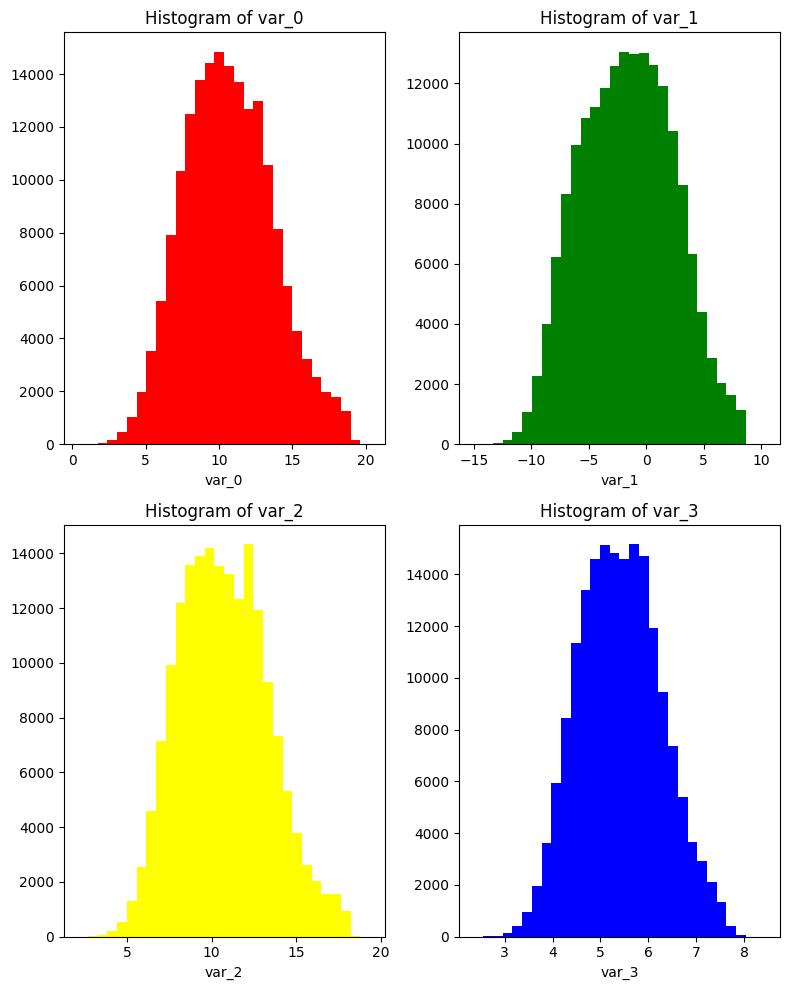

In [ ]:
# Return histogram of accuracy scores from cross-validation loop

feature_names = X.columns
if len(feature_names) < 4:
    raise ValueError("The dataset should contain at least 4 feature columns.")

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 10))
colors = ['red', 'green', 'yellow', 'blue']  # Colors for the histograms
n = 0

for i in range(2):
    for j in range(2):
        column = feature_names[n]  # Get the feature name
        axs[i, j].hist(X[column], color=colors[n], bins=30)  # Create histogram
        axs[i, j].set_xlabel(column)  # Set x-axis label
        axs[i, j].set_title(f'Histogram of {column}')  # Set title for clarity
        n += 1

plt.tight_layout()
plt.show()


17.  Present the confusion matrix and the results of your Classification Report (sklearn.metrics.classification_report). What do you notice?

**Results of my Classification Report and Confusion matrix**

*   **The model predicted the majority of No Transaction cases correctly (31,936 true negatives) with 92% Precision.**
*    **Whereas the model correctly predicted 781 transactions (true positives), but missed 442 real transactions, predicting No Transaction (false negatives) with only 64% Precision for identifying transactions, and 22% Recall.**
*   **Indicating the data collected at hand is not sufficient to help predict actual Transactions**
*   **Exploring other variables not in dataset and identifying better predictors would be helpful in increasing sales**

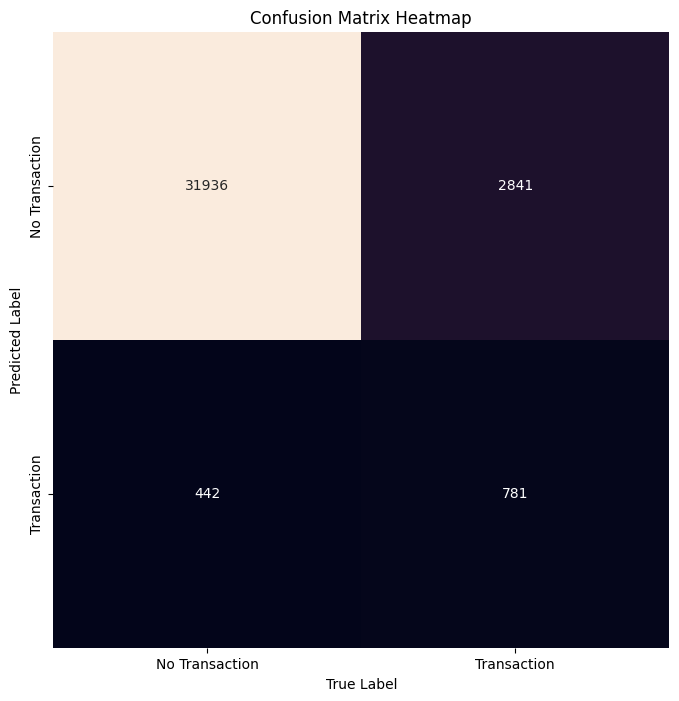

In [ ]:
#Return confusion matrix and results of Classification Report

import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier


y = trans_clean['target'].copy()  # Target variable
X = trans_clean.drop('target', axis=1)  # Predictor variables


# # Fit the model
gnb.fit(X_train, y_train)
predicted_y = gnb.predict(X_test)

#Generate the confusion matrix using confusion_matrix function, comparing true labels (y_test) and predicted labels (predicted_y).
mat = confusion_matrix(y_test, predicted_y)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(mat.T,  # Transpose the confusion matrix
            square=True,
            annot=True,  # Show the numbers in the squares
            fmt='d',  # Format for annotations
            cbar=False,
            xticklabels=['No Transaction', 'Transaction'],  # Adjust labels based on your target classes
            yticklabels=['No Transaction', 'Transaction'])  # Adjust labels based on your target classes
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
# True Positive: model correctly predicted 31936 cases would result in No Transaction
# False Positive: model incorrectly predicted 2841 cases would result in Transaction however they resulted in No Transaction
# False Negative: model incorrectly predicted 442 cases would result in No  Transaction however they resulted in a Transaction
# True Negative: model correctly predicted 781 cases would result in a Transaction

In [ ]:
print((442/781)*100)
print((1-442/781)*100)
print ((442/(442+781))*100)

56.59411011523687
43.40588988476313
36.140637775960755


In [ ]:
# # Calculate classification accuracy
accuracy = accuracy_score(y_test, predicted_y)

# Print the accuracy
print(f'Classification Accuracy: {accuracy:.2f}')

#when I played around with the axes labels, the data output was wrong.

Classification Accuracy: 0.91


In [ ]:
import sklearn.model_selection as model_selection

# 'trans_clean' is dataset and 'target' is the column I'm predicting
X = trans_clean.drop('target', axis=1)  # Features (all columns except target)
y = trans_clean['target']  # Target (the actual values you're predicting)

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Generate classification report
report = classification_report(y_test, y_pred, target_names=['No Transaction', 'Transaction'])

# Print the classification report
print("Classification Report:\n")
print(report)

Classification Report:

                precision    recall  f1-score   support

No Transaction       0.92      0.99      0.95     32378
   Transaction       0.64      0.22      0.32      3622

      accuracy                           0.91     36000
     macro avg       0.78      0.60      0.64     36000
  weighted avg       0.89      0.91      0.89     36000



In [ ]:
# Precision: Measures how many of the predicted positives are actual positives. (TP / (TP + FP))
# Recall (Sensitivity): Measures how many actual positives are correctly predicted/identified. (TP / (TP + FN))
# F1-score: The harmonic mean/balance between precision and recall.
# Support: The number of occurrences/true instances of each class.

In [ ]:
#The model predicted the majority of No Transaction cases correctly (31,936 true negatives) with 92% Precision.
# Whereas the model correctly predicted 781 transactions (true positives), but missed 442 real transactions, predicting no transaction for them (false negatives) with only 64% Precision for identifying transactions, and 22% Recall.
#Indicating the data collected at hand is not sufficient to help predict actual Transactions. Exploring other variables not in dataset and identifying better predictors would be helpful in increasing sales.

In [ ]:
X_train.shape

(144000, 50)

In [ ]:
y_train.shape

(144000,)

In [ ]:
X_test.shape

(36000, 50)

In [ ]:
y_test.shape

(36000,)


18. The training data is very skewed towards non-successful transactions (about 90% of the training data has ‘target’==0). Remove enough non-successful transaction rows so that your remaining training data is 50%/50% split between successful and non-successful transactions. Hint: you can use the data frames you created in step #9.

**Created new data set with even number of cases: t_set_new**

**18040 total**

In [ ]:
#Return new data set with 50/50 split b/t success & unsuccessful transactions

t_set = trans_clean.copy()

t_set_zeroes = t_set[t_set['target'] == 0]
t_set_ones = t_set[t_set['target'] == 1]

number_to_remove = 143920

t_set_zeroes_reduced = t_set_zeroes.sample(len(t_set_zeroes) - number_to_remove)

t_set_new = pd.concat([t_set_zeroes_reduced, t_set_ones], ignore_index = True)

In [ ]:
#Verify 50/50 split
t_set_new['target'].value_counts()

,count
target,
0,18040
1,18040



19. Repeat the cross-validation process on this data set. Report what your cross-validation accuracy is in this 50/50 case.

In [ ]:
# Return cross validation accuracy for 50/50 split df

Predictor_1= t_set_new.drop(columns=['target']).copy()

Target_1= t_set_new['target'].copy()

**Mean accuracy from cross validation for 50/50 Split df is 0.76**

In [ ]:
#Return cross validation accuracy for 50/50 split df

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

y = Target_1.copy()  # Target variable
X = Predictor_1.copy()  # Feature variables

gnb = GaussianNB()

cv_scores = cross_val_score(gnb, X, y, cv=5)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.2f}")
print(f"Standard deviation: {cv_scores.std():.2f}")

Cross-validation scores: [0.7536031  0.7565133  0.75221729 0.75540466 0.76662971]
Mean accuracy: 0.76
Standard deviation: 0.01


In [ ]:
y = Target_1.copy()  # Target variable
X = Predictor_1.copy()

results = cross_val_score(gnb, X, y, scoring='accuracy', cv = 10)
acc = results.mean()
acc

#Mean accuracy is 0.76 for 50/50 split

0.7567350332594235

**Fit GNB model to 50/50 Data Split df**

**Output indicates 75% of model predictions were correct in determining if a customer would make a transaction**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

y = Target_1.copy()
X = Predictor_1.copy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Model instantiation and fitting
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Making predictions
y_pred = gnb.predict(X_test)

# Calculating accuracy
accuracy_rate = accuracy_score(y_test, y_pred)

# Printing the accuracy
print(f"Accuracy Rate: {accuracy_rate:.2f}")

# Dynamic statement based on actual accuracy
if accuracy_rate >= 0.75:
    print(f"{accuracy_rate*100:.0f}% of predictions were correct in determining if a customer would make a transaction.")
else:
    print(f"The model has an accuracy of {accuracy_rate*100:.0f}%.")


Accuracy Rate: 0.76
76% of predictions were correct in determining if a customer would make a transaction.


## Data Visualization


20. Compare the results of your cross-validation with the whole training data and the reduced 50/50 training data



**Cross validation results of whole training data and reduced 50/50 training data indicate nearly identical accuracies**


*   **Whole training data accuracy: 0.9112166666666666**
*   **Reduced training data accuracy: 0.9116777777777777**



In [ ]:
#Return results from cross validation of whole training data and 50/50 split data

from sklearn.naive_bayes import GaussianNB

X = trans_clean.drop('target', axis=1)
y = trans_clean['target']

gnb = GaussianNB()

# 1. Cross-validate on the whole dataset
whole_data_results = cross_val_score(gnb, X, y, cv=10, scoring='accuracy')
whole_data_mean_accuracy = whole_data_results.mean()
print(f"Cross-validation accuracy on whole training data: {whole_data_mean_accuracy}")

# 2. Create a reduced 50/50 dataset by using train_test_split to split 50% of the data
Predictor_1, _, Target_1, _ = train_test_split(X, y, test_size=0.5, random_state=0)

# 3. Cross-validate on the reduced 50/50 data set
t_set_new_results = cross_val_score(gnb, Predictor_1, Target_1, cv=10, scoring='accuracy')
t_set_new_mean_accuracy = t_set_new_results.mean()
print(f"Cross-validation accuracy on 50/50 t_set_new data: {t_set_new_mean_accuracy}")

# 4. Compare the results
print("\nComparison of accuracies:")
print(f"Whole training data accuracy: {whole_data_mean_accuracy}")
print(f"Reduced training data accuracy: {t_set_new_mean_accuracy}")


Cross-validation accuracy on whole training data: 0.9112166666666666
Cross-validation accuracy on 50/50 t_set_new data: 0.9116777777777777

Comparison of accuracies:
Whole training data accuracy: 0.9112166666666666
Reduced training data accuracy: 0.9116777777777777



21. Present the confusion matrix and the results of your Classification Report (sklearn.metrics.classification_report)


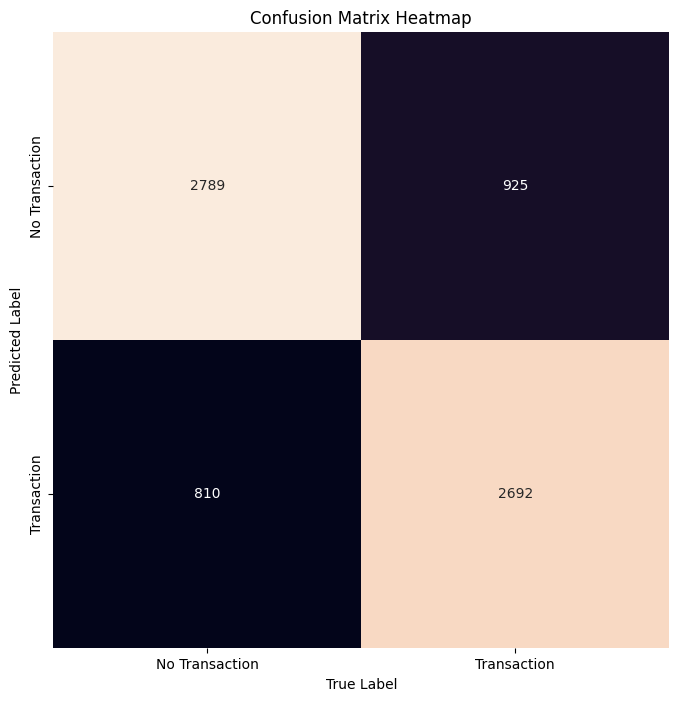

In [ ]:
# Confusion matrix and results of Classification Report
y = t_set_new['target'].copy()  # Target variable
X = t_set_new.drop('target', axis=1)  # Predictor variables


gnb.fit(X_train, y_train)

predicted_y = gnb.predict(X_test)

mat = confusion_matrix(y_test, predicted_y)

plt.figure(figsize=(8, 8))
sns.heatmap(mat.T,  # Transpose the confusion matrix
            square=True,
            annot=True,  # Show the numbers in the squares
            fmt='d',  # Format for annotations
            cbar=False,
            xticklabels=['No Transaction', 'Transaction'],
            yticklabels=['No Transaction', 'Transaction'])

plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
import sklearn.model_selection as model_selection

# 'trans_clean' is dataset and 'target' is the column I'm predicting
X = t_set_new.drop('target', axis=1)  # Features (all columns except target)
y = t_set_new['target']  # Target (the actual values you're predicting)

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['No Transaction', 'Transaction'])

# Print the classification report
print("Classification Report:\n")
print(report)

Classification Report:

                precision    recall  f1-score   support

No Transaction       0.75      0.77      0.76      3599
   Transaction       0.77      0.74      0.76      3617

      accuracy                           0.76      7216
     macro avg       0.76      0.76      0.76      7216
  weighted avg       0.76      0.76      0.76      7216



## Communicate the Results

22. Communicate the results of your analysis.



###**ANALYSIS**    
      *See Accuracy Comparison Table below*

*   **No Transaction: precision, recall, and F1-score for "No Transaction" class are significantly higher in Whole Dataset (92% precision, 99% recall) compared to 50/50 Split (75% precision, 75% recall). Showing GaussianNB identified "No Transaction" cases correctly and captured nearly all actual instances.**

* **Transaction: precision for "Transaction" class is lower in Whole Dataset (64% vs. 75%), and the recall is worse (22% vs. 75%). Meaning that the model's precision in predicting "Transactions" is better than actually identifying the "Transaction" case.**

*   **F1-score for "No Transaction" is better in Whole Dataset (0.95) than in 50/50 Split (0.75) which again shows better aptitude in this class.**

*   **However, F1-score for "Transaction" class in Whole Dataset (0.32) is significantly lower than in 50/50 Split (0.75), indicating the model is challenged when identifying "Transaction".**

*   **Overall accuracy is much higher in Whole Dataset (0.91 vs 0.75). This can be easily attributed to the disproportionately high cases in "No Transaction" class.**

* **50/50 Split has a balanced class performance with similar results for both classes on account of our data manipulation to even the cases.**


*   **Whole Dataset reveals class imbalance, where the model performs very well for "No Transaction" and not for "Transaction." Support is higher as well which will affect all other metrics.**


###   **Conclusion:**


*   **CNB Strengths: It is excellent at predicting "No Transaction," which might be beneficial in scenarios where identifying this class is critical.**
*   **CNB Weaknesses: It struggles in identifying "Transaction" class, indicating it leads to missed opportunities where sales are concerned.**


###**Next Steps: Find other techniques to balance the sample in order for  the model to improve identification of "Transactions" and maybe rethink variable selection.**



In [ ]:
# # ACCURACY COMPARISON TABLE

#                         Metric  Whole_data  50/50 Split
# 0                     Accuracy        0.91         0.75
# 1    F1-Score (No Transaction)        0.95         0.75
# 2       F1-Score (Transaction)        0.32         0.75
# 3           Macro Avg F1-Score        0.64         0.75
# 4          Macro Avg Precision        0.78         0.75
# 5             Macro Avg Recall        0.60         0.75
# 6   Precision (No Transaction)        0.92         0.75
# 7      Precision (Transaction)        0.64         0.75
# 8      Recall (No Transaction)        0.99         0.75
# 9         Recall (Transaction)        0.22         0.75
# 10    Support (No Transaction)    32378.00      3599.00
# 11       Support (Transaction)     3622.00      3617.00
# 12       Weighted Avg F1-Score        0.89         0.75
# 13      Weighted Avg Precision        0.89         0.75
# 14         Weighted Avg Recall        0.91         0.75


In [ ]:
import pandas as pd

# Data for Report 1
trans_clean = {
    'Metric': [
        'Precision (No Transaction)',
        'Recall (No Transaction)',
        'F1-Score (No Transaction)',
        'Support (No Transaction)',
        'Precision (Transaction)',
        'Recall (Transaction)',
        'F1-Score (Transaction)',
        'Support (Transaction)',
        'Accuracy',
        'Macro Avg Precision',
        'Macro Avg Recall',
        'Macro Avg F1-Score',
        'Weighted Avg Precision',
        'Weighted Avg Recall',
        'Weighted Avg F1-Score'
    ],
    'Whole_data': [
        0.92,  # Precision (No Transaction)
        0.99,  # Recall (No Transaction)
        0.95,  # F1-Score (No Transaction)
        32378,  # Support (No Transaction)
        0.64,  # Precision (Transaction)
        0.22,  # Recall (Transaction)
        0.32,  # F1-Score (Transaction)
        3622,   # Support (Transaction)
        0.91,  # Accuracy
        0.78,  # Macro Avg Precision
        0.60,  # Macro Avg Recall
        0.64,  # Macro Avg F1-Score
        0.89,  # Weighted Avg Precision
        0.91,  # Weighted Avg Recall
        0.89   # Weighted Avg F1-Score
    ]
}

# Data for Report 2
t_set_new = {
    'Metric': [
        'Precision (No Transaction)',
        'Recall (No Transaction)',
        'F1-Score (No Transaction)',
        'Support (No Transaction)',
        'Precision (Transaction)',
        'Recall (Transaction)',
        'F1-Score (Transaction)',
        'Support (Transaction)',
        'Accuracy',
        'Macro Avg Precision',
        'Macro Avg Recall',
        'Macro Avg F1-Score',
        'Weighted Avg Precision',
        'Weighted Avg Recall',
        'Weighted Avg F1-Score'
    ],
    '50/50 Split': [
        0.75,  # Precision (No Transaction)
        0.75,  # Recall (No Transaction)
        0.75,  # F1-Score (No Transaction)
        3599,   # Support (No Transaction)
        0.75,  # Precision (Transaction)
        0.75,  # Recall (Transaction)
        0.75,  # F1-Score (Transaction)
        3617,   # Support (Transaction)
        0.75,  # Accuracy
        0.75,  # Macro Avg Precision
        0.75,  # Macro Avg Recall
        0.75,  # Macro Avg F1-Score
        0.75,  # Weighted Avg Precision
        0.75,  # Weighted Avg Recall
        0.75   # Weighted Avg F1-Score
    ]
}


# Creating DataFrames
df_report_1 = pd.DataFrame(trans_clean)
df_report_2 = pd.DataFrame(t_set_new)

# Merging the DataFrames for comparison
comparison_df = pd.merge(df_report_1, df_report_2, on='Metric', how='outer')
comparison_df = comparison_df.rename(columns={'Report 1': 'Report 1', 'Report 2': 'Report 2'})

# Displaying the comparison table
print(comparison_df)


                        Metric  Whole_data  50/50 Split
0                     Accuracy        0.91         0.75
1    F1-Score (No Transaction)        0.95         0.75
2       F1-Score (Transaction)        0.32         0.75
3           Macro Avg F1-Score        0.64         0.75
4          Macro Avg Precision        0.78         0.75
5             Macro Avg Recall        0.60         0.75
6   Precision (No Transaction)        0.92         0.75
7      Precision (Transaction)        0.64         0.75
8      Recall (No Transaction)        0.99         0.75
9         Recall (Transaction)        0.22         0.75
10    Support (No Transaction)    32378.00      3599.00
11       Support (Transaction)     3622.00      3617.00
12       Weighted Avg F1-Score        0.89         0.75
13      Weighted Avg Precision        0.89         0.75
14         Weighted Avg Recall        0.91         0.75


## Submit Final Project

23. Upload your finished Jupyter notebook to your Project 1 student folder.
